In [1]:
import pandas as pd

%matplotlib inline

In [2]:
players = pd.read_csv('players.csv')
matches = pd.read_csv('match.csv')
heroes = pd.read_csv('hero_names.csv')
items = pd.read_csv('item_ids.csv')
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    189 non-null    int64 
 1   item_name  189 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [3]:
hero_lookup = dict(zip(heroes['hero_id'], heroes['localized_name']))
hero_lookup[0] = 'Unknown'
players['hero'] = players['hero_id'].apply(lambda _id: hero_lookup[_id])

In [4]:
item_lookup = dict(zip(items['item_id'], items['item_name']))
item_lookup[0] = 'Unknown'

def find_item(_id):
    return item_lookup.get(_id, 'u_' + str(_id))

players['item_0'] = players['item_0'].apply(find_item)
players['item_1'] = players['item_1'].apply(find_item)
players['item_2'] = players['item_2'].apply(find_item)
players['item_3'] = players['item_3'].apply(find_item)
players['item_4'] = players['item_4'].apply(find_item)
players['item_5'] = players['item_5'].apply(find_item)

In [5]:
player_heroes = pd.get_dummies(players['hero'])
player_heroes

,Abaddon,Alchemist,Ancient Apparition,Anti-Mage,Axe,Bane,Batrider,Beastmaster,Bloodseeker,Bounty Hunter,...,Venomancer,Viper,Visage,Warlock,Weaver,Windranger,Winter Wyvern,Witch Doctor,Wraith King,Zeus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
item0 = pd.get_dummies(players['item_0'].fillna(0))
item1 = pd.get_dummies(players['item_1'].fillna(0))
item2 = pd.get_dummies(players['item_2'].fillna(0))
item3 = pd.get_dummies(players['item_3'].fillna(0))
item4 = pd.get_dummies(players['item_4'].fillna(0))
item5 = pd.get_dummies(players['item_5'].fillna(0))

In [7]:
player_items = item0 \
    .add(item1, fill_value=0) \
    .add(item2, fill_value=0) \
    .add(item3, fill_value=0) \
    .add(item4, fill_value=0) \
    .add(item5, fill_value=0)


In [8]:
radiant_cols = list(map(lambda s: 'radiant_' + s, player_heroes.columns.values))
dire_cols = list(map(lambda s: 'dire_' + s, player_heroes.columns.values))

In [9]:
radiant_items_cols = list(map(lambda s: 'radiant_' + str(s), player_items.columns.values))
dire_items_cols = list(map(lambda s: 'dire_' + str(s), player_items.columns.values))

In [10]:
from os.path import isfile

X = None

radiant_heroes = []
dire_heroes = []

for _id, _index in players.groupby('match_id').groups.items():
    radiant_heroes.append(player_heroes.iloc[_index][:5].sum().values)
    dire_heroes.append(player_heroes.iloc[_index][5:].sum().values)

radiant_heroes = pd.DataFrame(radiant_heroes, columns=radiant_cols)
dire_heroes = pd.DataFrame(dire_heroes, columns=dire_cols)
X = pd.concat([radiant_heroes, dire_heroes], axis=1)
# X.to_csv('mapped_match_hero_item.csv', index=False)

In [11]:
X.head()

,radiant_Abaddon,radiant_Alchemist,radiant_Ancient Apparition,radiant_Anti-Mage,radiant_Axe,radiant_Bane,radiant_Batrider,radiant_Beastmaster,radiant_Bloodseeker,radiant_Bounty Hunter,...,dire_Venomancer,dire_Viper,dire_Visage,dire_Warlock,dire_Weaver,dire_Windranger,dire_Winter Wyvern,dire_Witch Doctor,dire_Wraith King,dire_Zeus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [12]:
y = matches['radiant_win'].apply(lambda win: 1 if win else 0)
classes = ['Dire Win', 'Radiant Win']

In [13]:
_ = pd.Series(y).apply(lambda i: classes[i]).value_counts()

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(45000, 222) (45000,)
(5000, 222) (5000,)


In [109]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [97]:
model = tf.keras.Sequential([
  Dense(128, input_shape=(222,)), 
  Dense(128, activation='relu'),
  Dropout(0.7),
  Dense(128, activation='relu'),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid'),
])

optimizer = Adam(lr=0.001)

model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 128)               28544     
_________________________________________________________________
dense_106 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_108 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 1)               

In [98]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train,batch_size=200, verbose=2, epochs=25, validation_data=(X_test, y_test), callbacks=[es])
history

Epoch 1/25
225/225 - 1s - loss: 0.6888 - accuracy: 0.5392 - val_loss: 0.6741 - val_accuracy: 0.5878
Epoch 2/25
225/225 - 1s - loss: 0.6714 - accuracy: 0.5891 - val_loss: 0.6678 - val_accuracy: 0.5896
Epoch 3/25
225/225 - 0s - loss: 0.6661 - accuracy: 0.5988 - val_loss: 0.6691 - val_accuracy: 0.5930
Epoch 00003: early stopping


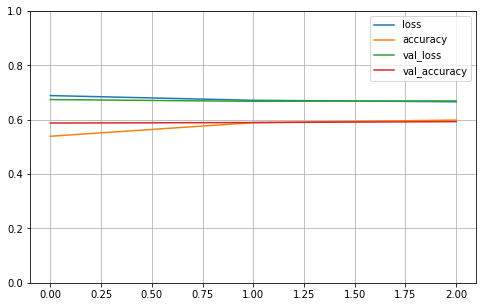

In [116]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [168]:
def predict_match(ind):
    tst = np.array([X_train.iloc[ind]])
    chance = model.predict(tst)
    xt = X_train.iloc[ind] 
    rs = xt.to_numpy().nonzero()
    heroes = xt.iloc[rs]
    return list(heroes.index), chance

In [170]:
for i in range(10,15):
    h, c = predict_match(i)
    print(h)
    print(c)
    print('\n')

['radiant_Phantom Assassin', 'radiant_Shadow Shaman', 'radiant_Treant Protector', 'radiant_Tusk', 'radiant_Windranger', 'dire_Alchemist', 'dire_Bounty Hunter', 'dire_Dark Seer', 'dire_Juggernaut', 'dire_Oracle']
[[0.4778517]]


['radiant_Bane', 'radiant_Bristleback', 'radiant_Lone Druid', 'radiant_Shadow Fiend', 'radiant_Spirit Breaker', 'dire_Batrider', 'dire_Omniknight', 'dire_Phantom Assassin', 'dire_Slardar', 'dire_Vengeful Spirit']
[[0.35859194]]


['radiant_Earth Spirit', 'radiant_Legion Commander', 'radiant_Pudge', 'radiant_Shadow Fiend', 'radiant_Wraith King', 'dire_Clinkz', 'dire_Doom', 'dire_Ember Spirit', 'dire_Lina', 'dire_Undying']
[[0.5574164]]


['radiant_Doom', 'radiant_Io', 'radiant_Ogre Magi', 'radiant_Shadow Fiend', 'radiant_Tiny', 'dire_Earthshaker', 'dire_Outworld Devourer', 'dire_Queen of Pain', 'dire_Riki', 'dire_Witch Doctor']
[[0.5402999]]


['radiant_Anti-Mage', 'radiant_Bristleback', 'radiant_Faceless Void', 'radiant_Invoker', 'radiant_Lina', 'dire_Queen of P